<a href="https://colab.research.google.com/github/LauraAlejandraFuentesArevalo/DS_Laura_Alejandra_Fuentes/blob/main/Clase14_Oct26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [46]:
df_train =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_set/ClaseOct26_train.csv")
df_test =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_set/ClaseOct26_test.csv")
print(df_train.keys())
df_train

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [48]:
X = df_train[['Sex','Pclass','Age','Fare','Survived']]
X.isnull().sum()

Sex           0
Pclass        0
Age         177
Fare          0
Survived      0
dtype: int64

In [49]:
X = X.dropna()
X.isnull().sum()

Sex         0
Pclass      0
Age         0
Fare        0
Survived    0
dtype: int64

In [50]:
X.describe()

,Pclass,Age,Fare,Survived
count,714.000000,714.000000,714.000000,714.000000
mean,2.236695,29.699118,34.694514,0.406162
std,0.838250,14.526497,52.918930,0.491460
min,1.000000,0.420000,0.000000,0.000000
25%,1.000000,20.125000,8.050000,0.000000
50%,2.000000,28.000000,15.741700,0.000000
75%,3.000000,38.000000,33.375000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [51]:
y = X['Survived']
X = X[['Sex','Pclass','Age','Fare']]

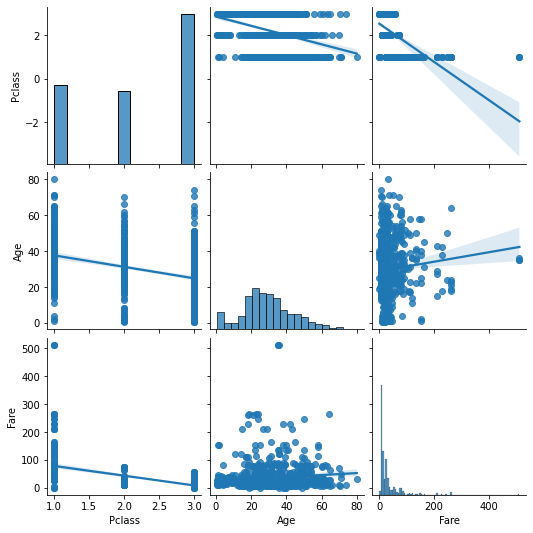

In [52]:
sns.pairplot(X,kind = 'reg')

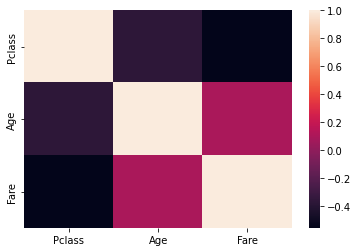

In [53]:
sns.heatmap(X.corr())

In [54]:
X['Sex'] = X['Sex'].map({'male':0,'female':1})
X

,Sex,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
885,1,3,39.0,29.1250
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
889,0,1,26.0,30.0000


In [55]:
X['Sex'].unique()

array([0, 1])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify=y,random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(571, 4) (143, 4) (571,) (143,)


In [57]:
reg_logistica = LogisticRegression(C=1,
                                   multi_class="auto",
                                   random_state=0,
                                   n_jobs=-1)
reg_logistica

LogisticRegression(C=1, n_jobs=-1, random_state=0)

In [58]:
reg_logistica.fit(X_train, y_train)

LogisticRegression(C=1, n_jobs=-1, random_state=0)

In [59]:
print("Intercepto: ",reg_logistica.intercept_)
print("Coeficientes: ",reg_logistica.coef_)
print("Coeficientes como lista: ",reg_logistica.coef_[0])
print(X_train.keys())

Intercepto:  [2.54396338]
Coeficientes:  [[ 2.25342690e+00 -1.22240092e+00 -3.97309867e-02  2.44682376e-05]]
Coeficientes como lista:  [ 2.25342690e+00 -1.22240092e+00 -3.97309867e-02  2.44682376e-05]
Index(['Sex', 'Pclass', 'Age', 'Fare'], dtype='object')


In [60]:
#Multiplicaré cada coeficiente para saber la probabilidad 
from math import exp
#Ejemplo:  La probabilidad de que sobrevida y es que es mujer, de clase 2 y tiene 50 años 
form =reg_logistica.intercept_+reg_logistica.coef_[0][0]*0+reg_logistica.coef_[0][1]*3+reg_logistica.coef_[0][2]*1+reg_logistica.coef_[0][3]*50
pos = exp(form)
prob = pos / (pos+1)

print("La probabilidad de que sea mujer, clase 2 y tiene 50 años:",prob)

La probabilidad de que sea mujer, clase 2 y tiene 50 años: 0.2383500016462299


In [61]:
y_pred_train=reg_logistica.predict(X_train)
y_pred_train

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,

In [62]:

#Qué tan exacto fue? 
print("Exactitud: ", metrics.accuracy_score(y_train, y_pred_train)) 

Exactitud:  0.7950963222416813


In [63]:
#Matriz de confusion: intenta comparar cada valor que se tiene
conf= metrics.confusion_matrix(y_train, y_pred_train)

print(conf)

#Si alguien sobrevivio y el sistema dijo que si sobreviría, es una cierto positivo.
#falso positivo: dijo que sobreviviría pero murio

#falsos que realmente eran falsos: 286
#falsos que realmente eran verdadero (se equivocó): 53
#verdaderos fueron declarados falsos (se equivocó): 64
#verdaderos fueron declarados verdaderos: 168 

[[286  53]
 [ 64 168]]


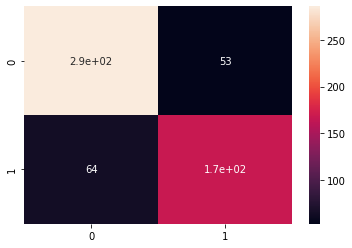

In [64]:
sns.heatmap(conf, annot=True)

Exactitud:  0.8321678321678322
[[78  7]
 [17 41]]


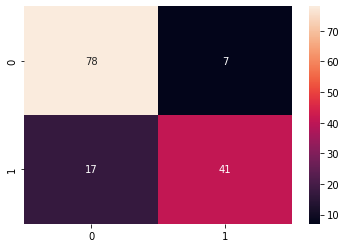

In [65]:
y_pred_test = reg_logistica.predict(X_test)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred_test))
conf= metrics.confusion_matrix(y_test, y_pred_test)
print(conf)
sns.heatmap(conf, annot=True)

#falsos que realmente eran falsos: 78
#falsos que realmente eran verdadero (se equivocó): 7
#verdaderos fueron declarados falsos (se equivocó): 17
#verdaderos fueron declarados verdaderos: 41

In [66]:
#La C significa regularización 
acc = []
for max_i in range(1,25):
  reg_logistica = LogisticRegression(C=1,
                                    multi_class="auto",
                                    random_state=0,
                                    n_jobs=-1,
                                    max_iter= max_i)
  reg_logistica.fit(X_train, y_train)

  y_pred_test=reg_logistica.predict(X_test)
  print("Exactitud",max_i,": ", metrics.accuracy_score(y_test, y_pred_test), metrics.log_loss(y_test, y_pred_test) )
  acc.append([max_i, metrics.accuracy_score(y_test, y_pred_test),metrics.log_loss(y_test, y_pred_test)])

Exactitud 1 :  0.6573426573426573 11.835054803562985
Exactitud 2 :  0.6713286713286714 11.351972627482269
Exactitud 3 :  0.6643356643356644 11.593502532341784
Exactitud 4 :  0.6573426573426573 11.8350324372013
Exactitud 5 :  0.6643356643356644 11.593502532341784
Exactitud 6 :  0.6783216783216783 11.11042594785149
Exactitud 7 :  0.6993006993006993 10.385813866911262
Exactitud 8 :  0.6923076923076923 10.627354954951617
Exactitud 9 :  0.6923076923076923 10.627354954951617
Exactitud 10 :  0.7062937062937062 10.144278370461326
Exactitud 11 :  0.7132867132867133 9.902737282420967
Exactitud 12 :  0.7062937062937062 10.144267187280482
Exactitud 13 :  0.7552447552447552 8.45357462803514
Exactitud 14 :  0.7622377622377622 8.212039131585204
Exactitud 15 :  0.7972027972027972 7.004395198878048
Exactitud 16 :  0.8391608391608392 5.555226952901798
Exactitud 17 :  0.8391608391608392 5.555226952901798
Exactitud 18 :  0.8321678321678322 5.796762449351735
Exactitud 19 :  0.8321678321678322 5.79676244935

metrics.log_loss     ES la pérdida 

In [67]:
df_acc = pd.DataFrame(acc)
print(df_acc)


     0         1          2
0    1  0.657343  11.835055
1    2  0.671329  11.351973
2    3  0.664336  11.593503
3    4  0.657343  11.835032
4    5  0.664336  11.593503
5    6  0.678322  11.110426
6    7  0.699301  10.385814
7    8  0.692308  10.627355
8    9  0.692308  10.627355
9   10  0.706294  10.144278
10  11  0.713287   9.902737
11  12  0.706294  10.144267
12  13  0.755245   8.453575
13  14  0.762238   8.212039
14  15  0.797203   7.004395
15  16  0.839161   5.555227
16  17  0.839161   5.555227
17  18  0.832168   5.796762
18  19  0.832168   5.796762
19  20  0.832168   5.796762
20  21  0.832168   5.796762
21  22  0.839161   5.555227
22  23  0.839161   5.555227
23  24  0.839161   5.555227


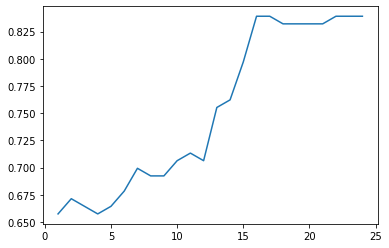

In [68]:
#como puntos:   plt.scatter(x = df_acc[0], y = df_acc[1])
#Grafica de Exactitud
#Como linea:
plt.plot(df_acc[0],df_acc[1])

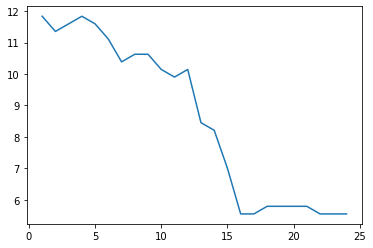

In [69]:
#Grafica de Pérdida
#como puntos:   plt.scatter(x = df_acc[0], y = df_acc[2])
#Grafica de Exactitud
#Como linea:
plt.plot(df_acc[0],df_acc[2])


**TRANSFORMACION DE VARIABLES - ESCALAMIENTO**

In [77]:
#Pipeline es para el procesamiento y limpieza de las variables. Proceso continuo de transformacion de variables
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
#Escalamiento
from sklearn.preprocessing import MinMaxScaler
#para las variables categoricas:
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [70]:
print("df_train.Survived: ", len(df_train.Survived.unique()))

print("df_train.Pclass: ", len(df_train.Pclass.unique()))

print("df_train.Sex: ", len(df_train.Sex.unique()))

print("df_train.Age: ", len(df_train.Age.unique()))

print("df_train.SibSp: ", len(df_train.SibSp.unique()))

print("df_train.Ticket: ", len(df_train.Ticket.unique()))

print("df_train.Fare: ", len(df_train.Fare.unique()))

print("df_train.Cabin: ", len(df_train.Cabin.unique()))

print("df_train.Embarked: ", len(df_train.Embarked.unique()))

print("df_train.Parch: ", len(df_train.Parch.unique()))

df_train.Survived:  2
df_train.Pclass:  3
df_train.Sex:  2
df_train.Age:  89
df_train.SibSp:  7
df_train.Ticket:  681
df_train.Fare:  248
df_train.Cabin:  148
df_train.Embarked:  4
df_train.Parch:  7


In [71]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [72]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [73]:
df_train.Survived = df_train.Survived.astype(str)
df_train.Pclass= df_train.Pclass.astype(str)
df_train.Sex = df_train.Sex.astype(str)
df_train.SibSp = df_train.SibSp.astype(str)
df_train.Cabin = df_train.Cabin.astype(str)
df_train.Embarked = df_train.Embarked.astype(str)
df_train.Survived = df_train.Survived.astype(str)
df_train.Parch = df_train.Parch.astype(str)
df_train.dtypes

PassengerId      int64
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp           object
Parch           object
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [74]:
#Selecciono variables numericas
x_num = df_train.select_dtypes(include = np.number).columns
x_num

Index(['PassengerId', 'Age', 'Fare'], dtype='object')

In [75]:
#Selecciono variables categoricas
x_cat = df_train.select_dtypes(include = np.object).columns
x_cat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Index(['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Cabin', 'Embarked'],
      dtype='object')

In [78]:
num_tras = Pipeline(steps=[
    ('scaler',MinMaxScaler(feature_range=(0,1)))
])

cat_tras = Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [80]:
preprocesamiento = ColumnTransformer(
    transformers=[
        ('num',num_tras,x_num),
        ('cat',cat_tras,x_cat)
    ]
)
preprocesamiento

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 Index(['PassengerId', 'Age', 'Fare'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Cabin', 'Embarked'],
      dtype='object'))])

In [81]:
preprocesamiento.fit_transform(df_train).toarray()

array([[0.        , 0.27117366, 0.01415106, ..., 0.        , 1.        ,
        0.        ],
       [0.0011236 , 0.4722292 , 0.13913574, ..., 0.        , 0.        ,
        0.        ],
       [0.00224719, 0.32143755, 0.01546857, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.99775281,        nan, 0.04577135, ..., 0.        , 1.        ,
        0.        ],
       [0.9988764 , 0.32143755, 0.0585561 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.39683338, 0.01512699, ..., 1.        , 0.        ,
        0.        ]])